<a href="https://colab.research.google.com/github/RoyMukta/Data-Science-Research-Project-Part-B/blob/main/LIWC_GoEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Project folder path
project_path = "/content/drive/My Drive/Project_N"

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project_N/Mental_health_cleaned.csv")

df.head()


,Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category
0,607679,Hi Check out this post if youre not sure how t...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,3/4/2025,Anxiety
1,180185,I had a car accident,And it was entirely my own fault I tried cross...,grovi,12724,5/21/2016,Anxiety
2,516409,Horrible week,Hi everyone Im having a horrible week so just ...,Whatsinaname,7809,9/25/2020,Anxiety
3,605332,New relationship anxiety,Dear All Just need a connection to feel the su...,Sammy,52665,1/10/2025,Anxiety
4,610948,Persistent constant anxiety,Hi there just reaching out to anyone who might...,Beepboop,55341,6/3/2025,Anxiety


In [ ]:
import re
liwc_dict = {
    "sadness": [
        "sad","unhappy","down","depressed","cry","hopeless","miserable","upset","alone","lonely"
    ],
    "anxiety": [
        "anxious","worried","nervous","panic","scared","fear","terrified","overthinking","stressed"
    ],
    "anger": [
        "angry","mad","furious","irritated","frustrated","rage","annoyed"
    ],
    "negative_emotion": [
        "bad","terrible","awful","horrible","worthless","useless","hate","pain"
    ],
    "positive_emotion": [
        "happy","great","good","love","excited","joy","relaxed"
    ],
    "first_person": [
        "i","me","my","mine","myself"
    ],
    "social": [
        "friend","partner","family","people","they","them"
    ],
    "cognitive": [
        "think","know","understand","aware","realize","why","because","should"
    ],
    "guilt": [
        "guilty","blame","fault","ashamed","regret","sorry"
    ],
}
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+","", text)
    text = re.sub(r"[^a-zA-Z\s]"," ", text)
    text = re.sub(r"\s+"," ", text)
    return text.strip()
df["clean_text"] = df["Post Content"].apply(clean_text)
def extract_liwc_features(text, liwc_dict):
    words = text.split()
    total = len(words) if len(words) > 0 else 1

    features = {}
    for category, lexicon in liwc_dict.items():
        count = sum(1 for w in words if w in lexicon)
        features[f"LIWC_{category}"] = count / total

    return pd.Series(features)
liwc_features = df["clean_text"].apply(lambda x: extract_liwc_features(x, liwc_dict))
df = pd.concat([df, liwc_features], axis=1)
df.head()



,Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,clean_text,LIWC_sadness,LIWC_anxiety,LIWC_anger,LIWC_negative_emotion,LIWC_positive_emotion,LIWC_first_person,LIWC_social,LIWC_cognitive,LIWC_guilt
0,607679,Hi Check out this post if youre not sure how t...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,3/4/2025,Anxiety,hi there and welcome to the anxiety section of...,0.000000,0.003509,0.0,0.000000,0.003509,0.000000,0.007018,0.017544,0.000000
1,180185,I had a car accident,And it was entirely my own fault I tried cross...,grovi,12724,5/21/2016,Anxiety,and it was entirely my own fault i tried cross...,0.000000,0.007905,0.0,0.000000,0.000000,0.079051,0.000000,0.015810,0.007905
2,516409,Horrible week,Hi everyone Im having a horrible week so just ...,Whatsinaname,7809,9/25/2020,Anxiety,hi everyone im having a horrible week so just ...,0.000000,0.000000,0.0,0.019608,0.019608,0.019608,0.000000,0.000000,0.000000
3,605332,New relationship anxiety,Dear All Just need a connection to feel the su...,Sammy,52665,1/10/2025,Anxiety,dear all just need a connection to feel the su...,0.006397,0.004264,0.0,0.000000,0.008529,0.081023,0.010661,0.010661,0.004264
4,610948,Persistent constant anxiety,Hi there just reaching out to anyone who might...,Beepboop,55341,6/3/2025,Anxiety,hi there just reaching out to anyone who might...,0.000000,0.000000,0.0,0.000000,0.000000,0.063745,0.007968,0.007968,0.000000


In [ ]:
import pandas as pd


# 1 LIWC++ DICTIONARY Focus on Mental Health

liwc_dict = {

    # Depression / Sadness
    "sadness": [
        "sad","unhappy","down","depressed","cry","hopeless",
        "miserable","upset","alone","lonely","empty","worthless",
        "numb","tears","crying","broken","lost"
    ],

    # Anxiety
    "anxiety": [
        "anxious","worried","nervous","panic","scared","fear",
        "terrified","overthinking","stressed","uneasy",
        "restless","tension","tensed","shaky"
    ],

    #  Anger
    "anger": [
        "angry","mad","furious","irritated","frustrated",
        "rage","annoyed","resent","hate","fed up"
    ],

    # Negative Emotion General
    "negative_emotion": [
        "bad","terrible","awful","horrible","worthless","useless",
        "pain","hurt","disgust","shame","failure"
    ],

    # Positive Emotion
    "positive_emotion": [
        "happy","great","good","love","excited","joy",
        "relaxed","grateful","calm","peaceful","hopeful"
    ],

    #Suicidality
    "suicidal": [
        "suicide","kill","die","dying","ending","end it",
        "selfharm","self-harm","harm myself","cutting","cut",
        "overdose","jump","want to die","not want to live",
        "give up","no reason to live","end my life"
    ],

    # Hopelessness
    "hopelessness": [
        "hopeless","pointless","meaningless","no hope",
        "never get better","nothing will change","stuck forever"
    ],

    # Rumination & Distortions
    "rumination": [
        "why","what if","overthinking","think too much",
        "again","repeating","loop","cant stop thinking"
    ],

    "catastrophizing": [
        "always","never","everything","nothing","ruined","broken",
        "disaster","worst","cant handle"
    ],

    #  Social
    "social_support": [
        "friend","partner","family","sister","brother","mum","dad",
        "talk","share","help","support","care"
    ],

    "social_withdrawal": [
        "alone","lonely","isolated","no one","nobody",
        "avoid","distance","keep away","withdraw"
    ],

    # Pronouns
    "first_person_singular": ["i","me","my","mine","myself"],
    "first_person_plural": ["we","us","our","ours"],
    "third_person": ["they","them","he","she"],

    #  Health Symptoms
    "health_symptoms": [
        "tired","exhausted","fatigue","weak","insomnia","headache",
        "pain","hurt","sick","ill","sleep","night"
    ],

    # Cognitive
    "cognitive": [
        "think","know","understand","aware","realize","should",
        "because","why","confused","uncertain","maybe","perhaps"
    ],

    # Financial Stress
    "financial_stress": [
        "money","bills","rent","debt","broke","financial",
        "jobless","unemployed","struggling"
    ],

    #  Misc Informal
    "swear": ["fuck","shit","damn","hell","pissed"],
    "netspeak": ["lol","omg","idk","lmao","wtf"]
}

# 2 FEATURE EXTRACTION FUNCTION

def extract_liwc_features(text, liwc_dict):
    if pd.isna(text):
        text = ""
    text = text.lower()
    words = text.split()
    total = len(words)

    features = {}
    for category, lexicon in liwc_dict.items():
        count = sum(1 for w in words if w in lexicon)
        features[category] = count / total if total > 0 else 0
    return pd.Series(features)


# 3 LOAD DATASET

df = pd.read_csv("/content/drive/MyDrive/Project_B/Mental_health_cleaned.csv")


# APPLY LIWC++ TO EACH POST

liwc_features_df = df["Post Content"].apply(
    lambda x: extract_liwc_features(x, liwc_dict)
)

df_liwc = pd.concat([df, liwc_features_df], axis=1)


# 5 SAVE OUTPUT

output_path = "/content/drive/MyDrive/Project_B/Mental_health_LIWC_features.csv"
df_liwc.to_csv(output_path, index=False)

print("✅ LIWC++ Feature Extraction Completed!")
print("💾 Saved to:", output_path)


✅ LIWC++ Feature Extraction Completed!
💾 Saved to: /content/drive/MyDrive/Project_B/Mental_health_LIWC_features.csv


In [ ]:
import pandas as pd

# LIWC DICTIONARY


liwc_dict = {

    # Sadness / Depression
    "sadness": [
        "sad","unhappy","down","depressed","cry","hopeless",
        "miserable","upset","alone","lonely","empty","worthless",
        "numb","tears","crying","broken","lost"
    ],

    #  Anxiety
    "anxiety": [
        "anxious","worried","nervous","panic","scared","fear",
        "terrified","overthinking","stressed","uneasy",
        "restless","tension","tensed","shaky"
    ],

    #  Anger
    "anger": [
        "angry","mad","furious","irritated","frustrated",
        "rage","annoyed","resent","hate","fed up"
    ],

    #  Negative Emotion
    "negative_emotion": [
        "bad","terrible","awful","horrible","worthless","useless",
        "pain","hurt","disgust","shame","failure"
    ],

    #  Positive Emotion
    "positive_emotion": [
        "happy","great","good","love","excited","joy",
        "relaxed","grateful","calm","peaceful","hopeful"
    ],

    #  Suicidal Ideation
    "suicidal": [
        "suicide","kill","die","dying","ending","end it",
        "selfharm","self-harm","harm myself","cutting","cut",
        "overdose","jump","want to die","not want to live",
        "give up","no reason to live","end my life"
    ],

    #  Hopelessness
    "hopelessness": [
        "hopeless","pointless","meaningless","no hope",
        "never get better","nothing will change","stuck forever"
    ],

    #  Rumination
    "rumination": [
        "why","what if","overthinking","think too much",
        "again","repeating","loop","cant stop thinking"
    ],

    #  Cognitive Distortions
    "catastrophizing": [
        "always","never","everything","nothing","ruined","broken",
        "disaster","worst","cant handle"
    ],

    #  Social
    "social_support": [
        "friend","partner","family","sister","brother","mum","dad",
        "talk","share","help","support","care"
    ],

    "social_withdrawal": [
        "alone","lonely","isolated","no one","nobody",
        "avoid","distance","keep away","withdraw"
    ],

    #  Pronouns
    "first_person_singular": [
        "i","me","my","mine","myself"
    ],

    "first_person_plural": [
        "we","us","our","ours"
    ],

    "third_person": [
        "they","them","he","she"
    ],

    #  Health Symptoms
    "health_symptoms": [
        "tired","exhausted","fatigue","weak","insomnia","headache",
        "pain","hurt","sick","ill","sleep","night"
    ],

    # Cognitive Processes
    "cognitive": [
        "think","know","understand","aware","realize","should",
        "because","why","confused","uncertain","maybe","perhaps"
    ],

    #  Financial Stress
    "financial_stress": [
        "money","bills","rent","debt","broke","financial",
        "jobless","unemployed","struggling"
    ],

    #  Swear / Informal ---
    "swear": [
        "fuck","shit","damn","hell","pissed"
    ],

    "netspeak": [
        "lol","omg","idk","lmao","wtf"
    ]
}


#  FEATURE EXTRACTION FUNCTION


def extract_liwc_features(text, liwc_dict):
    text = str(text).lower()
    words = text.split()
    total = len(words)

    features = {}
    for category, lexicon in liwc_dict.items():
        count = sum(1 for w in words if w in lexicon)
        features[category] = count / total if total > 0 else 0

    return pd.Series(features)


#  LOAD DATASET


df = pd.read_csv("/content/drive/MyDrive/Project_B/Mental_health_cleaned.csv")

print("Loaded dataset:", df.shape)



# APPLY LIWC FEATURE EXTRACTION


liwc_features_df = df["Post Content"].apply(lambda x: extract_liwc_features(x, liwc_dict))

df_liwc = pd.concat([df, liwc_features_df], axis=1)



# SAVE OUTPUT


output_path = "/content/drive/MyDrive/Project_B/Mental_health_LIWC_features.csv"
df_liwc.to_csv(output_path, index=False)

print(f"Saved LIWC++ features to: {output_path}")



#SAMPLE OUTPUT


df_liwc.head()


Loaded dataset: (26749, 7)
Saved LIWC++ features to: /content/drive/MyDrive/Project_B/Mental_health_LIWC_features.csv


,Post ID,Post Title,Post Content,Post Author,User ID,Post Date,Post Category,sadness,anxiety,anger,...,social_support,social_withdrawal,first_person_singular,first_person_plural,third_person,health_symptoms,cognitive,financial_stress,swear,netspeak
0,607679,Hi Check out this post if youre not sure how t...,Hi there and welcome to the Anxiety section of...,BeyondBlue,54597,3/4/2025,Anxiety,0.000000,0.003509,0.0,...,0.017544,0.000000,0.000000,0.028070,0.000000,0.000000,0.017544,0.000000,0.0,0.0
1,180185,I had a car accident,And it was entirely my own fault I tried cross...,grovi,12724,5/21/2016,Anxiety,0.000000,0.007905,0.0,...,0.000000,0.000000,0.079051,0.000000,0.000000,0.007905,0.015810,0.000000,0.0,0.0
2,516409,Horrible week,Hi everyone Im having a horrible week so just ...,Whatsinaname,7809,9/25/2020,Anxiety,0.000000,0.000000,0.0,...,0.000000,0.000000,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,605332,New relationship anxiety,Dear All Just need a connection to feel the su...,Sammy,52665,1/10/2025,Anxiety,0.006289,0.004193,0.0,...,0.020964,0.006289,0.079665,0.010482,0.012579,0.000000,0.012579,0.000000,0.0,0.0
4,610948,Persistent constant anxiety,Hi there just reaching out to anyone who might...,Beepboop,55341,6/3/2025,Anxiety,0.000000,0.000000,0.0,...,0.007874,0.000000,0.062992,0.000000,0.000000,0.003937,0.007874,0.003937,0.0,0.0


# Rule based lebel

In [ ]:

# 1. Anxiety Classification

def classify_anxiety(row):
    score = 0

    score += row["anxiety"] * 3
    score += row["rumination"] * 2
    score += row["health_symptoms"] * 1.5
    score += row["negative_emotion"] * 1
    score += row["first_person_singular"] * 0.5

    # Reduce score for positive emotion
    score -= row["positive_emotion"] * 1

    return 1 if score > 0.15 else 0



# Depression Classification

def classify_depression(row):
    score = 0

    score += row["sadness"] * 3
    score += row["hopelessness"] * 3
    score += row["rumination"] * 2
    score += row["social_withdrawal"] * 2
    score += row["negative_emotion"] * 2
    score += row["health_symptoms"] * 1.5

    # score for positive emotion
    score -= row["positive_emotion"] * 1.5

    return 1 if score > 0.20 else 0



# Suicidal Ideation Classification

def classify_suicidal(row):
    score = 0

    score += row["suicidal"] * 5
    score += row["hopelessness"] * 3
    score += row["sadness"] * 2
    score += row["negative_emotion"] * 1.5

    return 1 if score > 0.05 else 0



# Apply Classifiers

df_liwc["anxiety_label"] = df_liwc.apply(classify_anxiety, axis=1)
df_liwc["depression_label"] = df_liwc.apply(classify_depression, axis=1)
df_liwc["suicidal_label"] = df_liwc.apply(classify_suicidal, axis=1)



# Save Classified Output

output_path = "/content/drive/MyDrive/Project_B/Mental_health_LIWC_classified.csv"
df_liwc.to_csv(output_path, index=False)
print(f"Saved classified dataset to: {output_path}")



#  Display Sample Output

df_liwc[[
    "Post Content",
    "anxiety_label",
    "depression_label",
    "suicidal_label"
]].head(10)


Saved classified dataset to: /content/drive/MyDrive/Project_B/Mental_health_LIWC_classified.csv


,Post Content,anxiety_label,depression_label,suicidal_label
0,Hi there and welcome to the Anxiety section of...,0,0,0
1,And it was entirely my own fault I tried cross...,0,0,0
2,Hi everyone Im having a horrible week so just ...,0,0,1
3,Dear All Just need a connection to feel the su...,0,0,0
4,Hi there just reaching out to anyone who might...,0,0,0
5,Recently my anxiety has flared As soon as I wa...,1,0,0
6,Has anyone has success with HBOT Therapy for P...,0,0,0
7,Im 4 months in to my apprenticeship and em str...,0,0,0
8,I am currently an international student I alre...,0,0,0
9,Just need help processing things been diagnose...,0,0,0


In [ ]:
def classify_anxiety(row):
    score = 0

    score += row["anxiety"] * 3
    score += row["rumination"] * 2
    score += row["health_symptoms"] * 1.5
    score += row["negative_emotion"] * 1
    score += row["first_person_singular"] * 0.5

    score -= row["positive_emotion"] * 1

    return 1 if score > 0.05 else 0   # LOWER threshold used


In [ ]:

# 1. Anxiety Classification

def classify_anxiety(row):
    score = 0

    score += row["anxiety"] * 3
    score += row["rumination"] * 2
    score += row["health_symptoms"] * 1.5
    score += row["negative_emotion"] * 1
    score += row["first_person_singular"] * 0.5

    # Reduce score if positive emotions exist
    score -= row["positive_emotion"] * 1

    return 1 if score > 0.05 else 0



# 2. Depression Classification

def classify_depression(row):
    score = 0

    score += row["sadness"] * 3
    score += row["hopelessness"] * 3
    score += row["rumination"] * 2
    score += row["social_withdrawal"] * 2
    score += row["negative_emotion"] * 2
    score += row["health_symptoms"] * 1.5

    # Positive emotions reduce depression likelihood
    score -= row["positive_emotion"] * 1.5

    return 1 if score > 0.08 else 0   # LOWER THRESHOLD used



 3. Suicidal Ideation Classification (Updated Threshold)

def classify_suicidal(row):
    score = 0

    score += row["suicidal"] * 5
    score += row["hopelessness"] * 3
    score += row["sadness"] * 2
    score += row["negative_emotion"] * 1.5

    return 1 if score > 0.02 else 0   # UPDATED VERY SENSITIVE THRESHOLD



# Apply All Classifiers to Dataset

df_liwc["anxiety_label"] = df_liwc.apply(classify_anxiety, axis=1)
df_liwc["depression_label"] = df_liwc.apply(classify_depression, axis=1)
df_liwc["suicidal_label"] = df_liwc.apply(classify_suicidal, axis=1)


# ave Classified Dataset

output_path = "/content/drive/MyDrive/Project_B/Mental_health_LIWC_classified.csv"
df_liwc.to_csv(output_path, index=False)

print(f"Saved classified dataset to: {output_path}")



# Show Sample Output (Top 10 Rows)

df_liwc[[
    "Post Content",
    "anxiety_label",
    "depression_label",
    "suicidal_label"
]].head(10)


Saved classified dataset to: /content/drive/MyDrive/Project_B/Mental_health_LIWC_classified.csv


,Post Content,anxiety_label,depression_label,suicidal_label
0,Hi there and welcome to the Anxiety section of...,0,0,0
1,And it was entirely my own fault I tried cross...,1,0,0
2,Hi everyone Im having a horrible week so just ...,0,0,1
3,Dear All Just need a connection to feel the su...,0,0,1
4,Hi there just reaching out to anyone who might...,1,0,0
5,Recently my anxiety has flared As soon as I wa...,1,1,0
6,Has anyone has success with HBOT Therapy for P...,0,0,0
7,Im 4 months in to my apprenticeship and em str...,0,0,0
8,I am currently an international student I alre...,1,0,0
9,Just need help processing things been diagnose...,1,0,0


# Feature selection

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Project_B/Mental_health_Emotion_features.csv")

feature_cols = [
    'positive_emotion','negative_emotion','anxiety','first_person',
    'social','cognitive','biological','suicidal_terms',
]

features = df[feature_cols]


In [ ]:
corr = features.corr()
corr


,positive_emotion,negative_emotion,anxiety,first_person,social,cognitive,biological,suicidal_terms
positive_emotion,1.000000,0.044206,-0.063597,-0.012192,-0.008563,0.005391,-0.021207,-0.005721
negative_emotion,0.044206,1.000000,-0.012623,0.091456,0.004669,0.024275,0.121209,0.034540
anxiety,-0.063597,-0.012623,1.000000,0.052931,-0.034289,0.000965,0.055603,-0.013957
first_person,-0.012192,0.091456,0.052931,1.000000,0.006560,0.168099,0.020002,0.030362
social,-0.008563,0.004669,-0.034289,0.006560,1.000000,0.041593,-0.048302,0.005727
cognitive,0.005391,0.024275,0.000965,0.168099,0.041593,1.000000,-0.049120,0.029365
biological,-0.021207,0.121209,0.055603,0.020002,-0.048302,-0.049120,1.000000,0.021197
suicidal_terms,-0.005721,0.034540,-0.013957,0.030362,0.005727,0.029365,0.021197,1.000000


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.Graph()

# Add nodes
for col in feature_cols:
    G.add_node(col)

# Add edges based on correlation strength
threshold = 0.15

for i in corr.columns:
    for j in corr.columns:
        if i != j:
            weight = corr.loc[i, j]
            if abs(weight) > threshold:
                G.add_edge(i, j, weight=weight)


In [ ]:

#  CHUNK 1 PREPARE DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.covariance import GraphicalLassoCV
import ast

# 1. Load  dataset
df = pd.read_csv("/content/drive/MyDrive/Project_B/Mental_health_Emotion_features.csv")

# 2. Define all emotion labels
emotion_list = [
    'gratitude','admiration','approval','optimism','love','caring',
    'fear','nervousness','sadness','disappointment','confusion',
    'realization','neutral','curiosity','grief','desire','surprise',
    'joy','pride','embarrassment'
]

# 3. Convert string of list  real Python list
df['Top_Emotions'] = df['Top_Emotions'].apply(lambda x: ast.literal_eval(x))

# 4. Create empty columns for emotion probabilities
for emo in emotion_list:
    df[emo] = 0.0

# 5. Fill probability for each emotion
for idx, row in df.iterrows():
    for (emo, prob) in row['Top_Emotions']:
        if emo in emotion_list:
            df.at[idx, emo] = prob

# 6. Build matrix X (emotion probabilities only)
X = df[emotion_list].fillna(0)

# Normalize (very important for GGM)
X = (X - X.mean()) / X.std()

# 7. Fit Gaussian Graphical Model (Graphical Lasso)
model = GraphicalLassoCV()
model.fit(X)

# 8. Compute partial correlation matrix
precision = model.precision_
partial_corr = -precision / np.sqrt(np.outer(np.diag(precision), np.diag(precision)))
np.fill_diagonal(partial_corr, 0)


# GoEmotion Partial Correlation Network (Gaussian Graphical Model

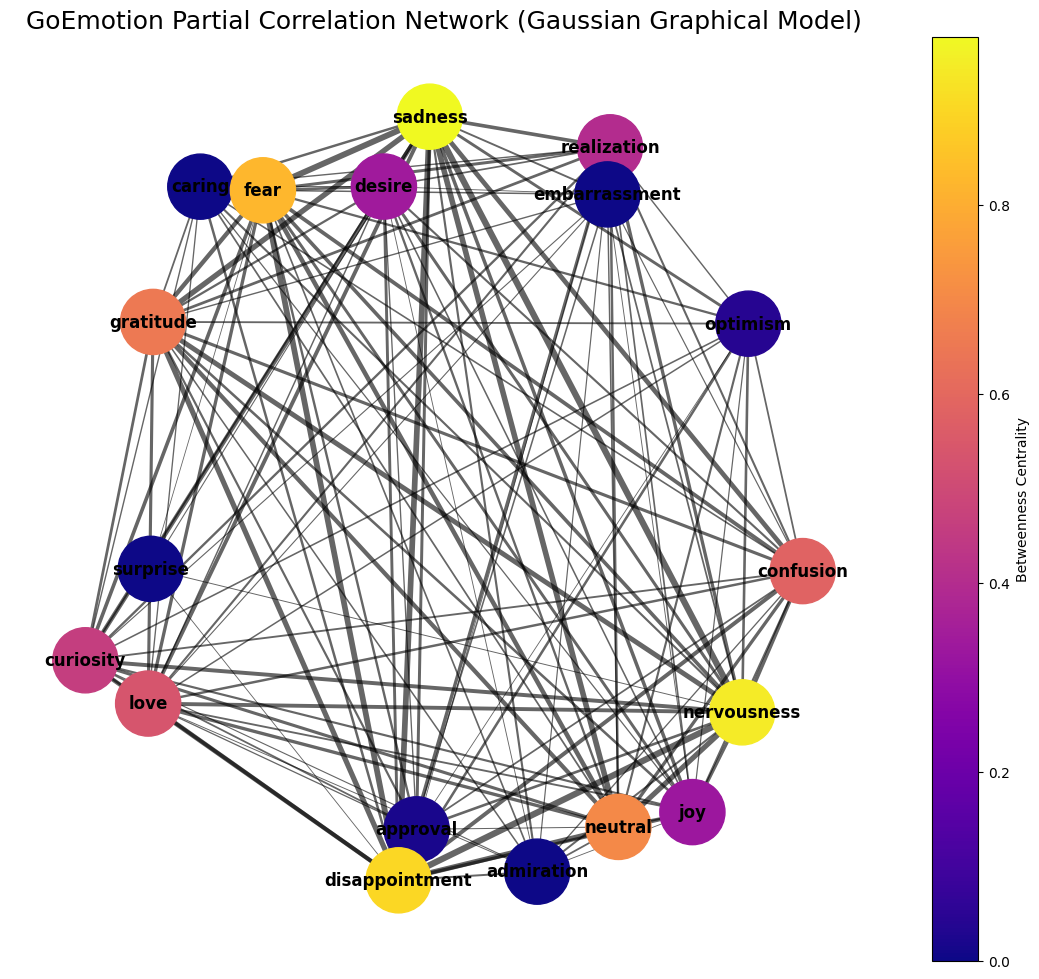

In [ ]:
# =====================#
#  CHUNK 2 – BUILD NETWORK + CENTRALITY + PLOT
# =====================#

# 9. Build network using partial correlations
G = nx.Graph()

threshold = 0.08

for i, emo_i in enumerate(emotion_list):
    for j, emo_j in enumerate(emotion_list):
        weight = partial_corr[i, j]
        if abs(weight) > threshold:
            G.add_edge(emo_i, emo_j, weight=weight)

# 10. Centrality analysis
bet = nx.betweenness_centrality(G, weight='weight')
deg = nx.degree_centrality(G)

# 11. Draw network
plt.figure(figsize=(14, 12))

pos = nx.spring_layout(G, k=0.5, iterations=40)

# Node colors = betweenness centrality
node_colors = [bet[node] for node in G.nodes()]
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    cmap="plasma",
    node_size=2200
)

# Edges = weighted by partial correlation
nx.draw_networkx_edges(
    G, pos,
    width=[abs(G[u][v]['weight']) * 7 for u, v in G.edges()],
    alpha=0.6
)

# Node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Colorbar
plt.colorbar(nodes, label="Betweenness Centrality")
plt.title("GoEmotion Partial Correlation Network (Gaussian Graphical Model)", fontsize=18)

plt.axis('off')
plt.show()
